In [92]:
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn import cluster
import numpy as np


In [93]:
data = pd.read_csv('Preprocessed.csv')

In [94]:
data

,Age,Gender,University,Department,Year,Current CGPA,Stress value,Anxiety value,Depression value
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS,2,2.50 - 2.99,0.760870,0.716667,0.712121
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS,3,3.00 - 3.39,0.684783,0.550000,0.712121
2,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,0.010870,0.000000,0.000000
3,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,0.489130,0.483333,0.478788
4,18-22,Male,North South University (NSU),Engineering - CS,2,2.50 - 2.99,0.804348,0.633333,0.769697
...,...,...,...,...,...,...,...,...,...
2023,18-22,Male,Dhaka University (DU),Other,2,3.00 - 3.39,0.793478,1.000000,0.669697
2024,18-22,Female,Bangladesh Agricultural University (BAU),Engineering - CS,3,3.00 - 3.39,0.826087,0.800000,0.748485
2025,18-22,Male,American International University Bangladesh (...,Engineering - CS,2,2.50 - 2.99,0.554348,0.633333,0.530303
2026,23-26,Female,Dhaka University (DU),Other,3,3.40 - 3.79,0.847826,1.000000,0.772727


In [95]:
data.describe()

,Year,Stress value,Anxiety value,Depression value
count,2028.000000,2028.000000,2028.000000,2028.000000
mean,2.311144,0.585038,0.585585,0.529380
std,1.190877,0.198531,0.260009,0.249647
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.456522,0.383333,0.333333
50%,2.000000,0.586957,0.600000,0.527273
75%,3.000000,0.750000,0.800000,0.715152
max,4.000000,1.000000,1.000000,1.000000


## K-Means

As we can see, Stress, Anxiety and Depression have different ranges so we decided to normalize them to use K-Means.

In [96]:
# data['Stress value normalized'] = zscore(data['Stress value'])
# data['Anxiety value normalized'] = zscore(data['Anxiety value'])
# data['Depression value normalized'] = zscore(data['Depression value'])

We decided to make a cluster analysis between Depression and Anxiety. We use the Elbow Method to find out the number of clusters needed

Text(0, 0.5, 'SSE')

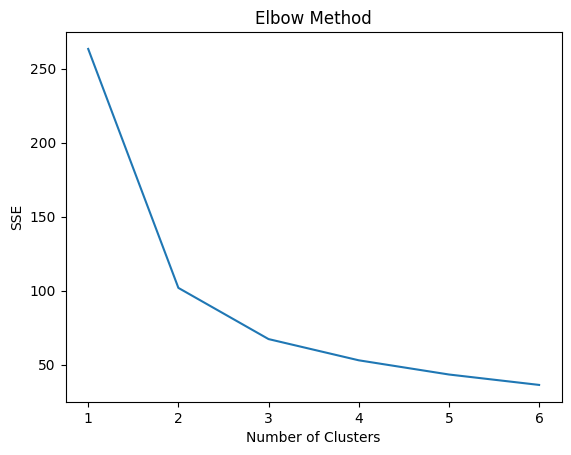

In [97]:
numClusters = [1,2,3,4,5,6]
SSE = []

for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    k_means.fit(data[['Depression value', 'Anxiety value']])
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [98]:
kmeans = cluster.KMeans(n_clusters=3, init="k-means++", n_init = 10)
kmeans = kmeans.fit(data[['Depression value', 'Anxiety value']])
kmeans.cluster_centers_

array([[0.26599018, 0.29882773],
       [0.80760527, 0.86791126],
       [0.5305269 , 0.60356201]])

In [99]:
data['Cluster number'] = kmeans.labels_

In [100]:
data

,Age,Gender,University,Department,Year,Current CGPA,Stress value,Anxiety value,Depression value,Cluster number
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS,2,2.50 - 2.99,0.760870,0.716667,0.712121,1
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS,3,3.00 - 3.39,0.684783,0.550000,0.712121,2
2,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,0.010870,0.000000,0.000000,0
3,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,0.489130,0.483333,0.478788,2
4,18-22,Male,North South University (NSU),Engineering - CS,2,2.50 - 2.99,0.804348,0.633333,0.769697,1
...,...,...,...,...,...,...,...,...,...,...
2023,18-22,Male,Dhaka University (DU),Other,2,3.00 - 3.39,0.793478,1.000000,0.669697,1
2024,18-22,Female,Bangladesh Agricultural University (BAU),Engineering - CS,3,3.00 - 3.39,0.826087,0.800000,0.748485,1
2025,18-22,Male,American International University Bangladesh (...,Engineering - CS,2,2.50 - 2.99,0.554348,0.633333,0.530303,2
2026,23-26,Female,Dhaka University (DU),Other,3,3.40 - 3.79,0.847826,1.000000,0.772727,1


In [101]:
# data[data["Depression value">25 & "Anxiety value"<5]]

<Axes: xlabel='Depression value', ylabel='Anxiety value'>

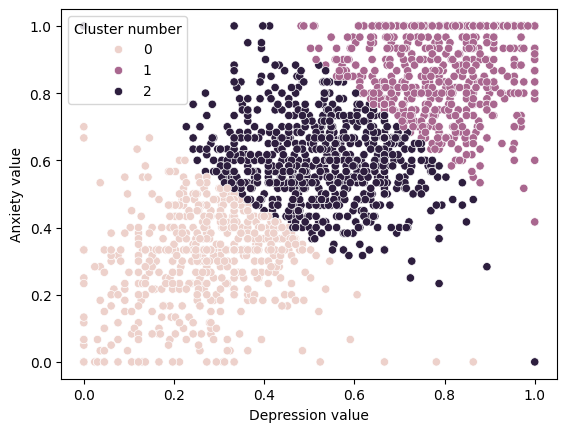

In [102]:
sns.scatterplot(data=data, x='Depression value', y='Anxiety value', hue='Cluster number')

## K-Means++

Now we do the cluster analysis for three dimesions (Depression value, Stress value and Anxiety value)

Searching best number of clusters using the Elbow Method

Text(0, 0.5, 'SSE')

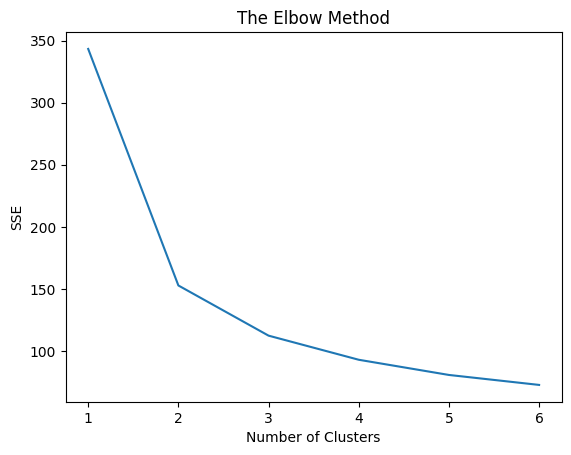

In [103]:
numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k, init='k-means++',random_state=0, n_init=10)
    k_means.fit(data[['Depression value', 'Stress value', 'Anxiety value']])
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [104]:
kmeans_3d = cluster.KMeans(n_clusters=3, init="k-means++", n_init = 10)
kmeans_3d = kmeans.fit(data[['Depression value', 'Stress value', 'Anxiety value']])
kmeans_3d.cluster_centers_

data['Cluster number'] = kmeans.labels_

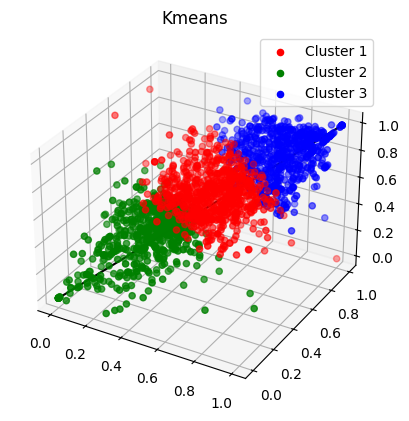

In [ ]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 1, 1000)
yline = np.linspace(0, 1, 1000)
zline = np.linspace(0, 1, 1000)

kplot.plot3D(xline, yline, zline, 'black')

cluster1 = data[data['Cluster number'] == 0]
cluster2 = data[data['Cluster number'] == 1]
cluster3 = data[data['Cluster number'] == 2]

kplot.scatter3D(cluster1["Depression value"], cluster1["Stress value"], cluster1["Anxiety value"], c='red', label = 'Cluster 1')
kplot.scatter3D(cluster2["Depression value"], cluster2["Stress value"], cluster2["Anxiety value"], c ='green', label = 'Cluster 2')
kplot.scatter3D(cluster3["Depression value"], cluster3["Stress value"], cluster3["Anxiety value"], c ='blue', label = 'Cluster 3')

plt.legend()

plt.title("K-Means 3D")

plt.show()